In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
class PCA:
  def __init__(self, n_components):
    self.n_components = n_components
    self.components = None
    self.mean = None

  def fit(self, X):
    self.mean = np.mean(X, axis=0)
    X = X - self.mean

    cov = np.cov(X.T)

    eigenvalues, eigenvectors, = np.linalg.eig(cov)

    eigenvectors = eigenvectors.T
    idxs = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    self.components = eigenvectors[:self.n_components]


  def transform(self, X):
    X = X - self.mean
    return np.dot(X, self.components.T)

In [3]:
class LDA:
  def __init__(self, n_components):
    self.n_components = n_components
    self.linear_discriminants = None

  def fit(self, X, y):
    n_features = X.shape[1]
    class_labels = np.unique(y)

    mean_overall = np.mean(X, axis=0)
    SW = np.zeros((n_features, n_features))
    SB = np.zeros((n_features, n_features))

    for c in class_labels:
      X_c = X[y == c]
      mean_c = np.mean(X_c, axis=0)
      SW += (X_c - mean_c).T.dot((X_c - mean_c))

      n_c = X_c.shape[0]
      mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
      SB += n_c * (mean_diff).dot(mean_diff.T)

    A = np.linalg.inv(SW).dot(SB)

    eigenvalues, eigenvectors = np.linalg.eig(A)

    eigenvectors = eigenvectors.T
    idxs = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    self.linear_discriminants = eigenvectors[:self.n_components]

  def transform(self, X):
    return np.dot(X, self.linear_discriminants.T)

Shape of Data: (150, 4)


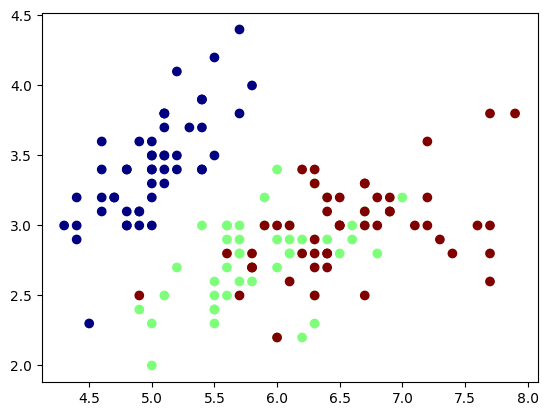

Shape of Data: (150, 2)


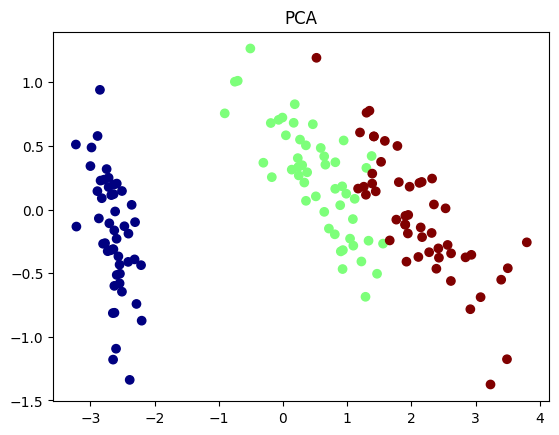

Shape of transformed Data: (150, 2)


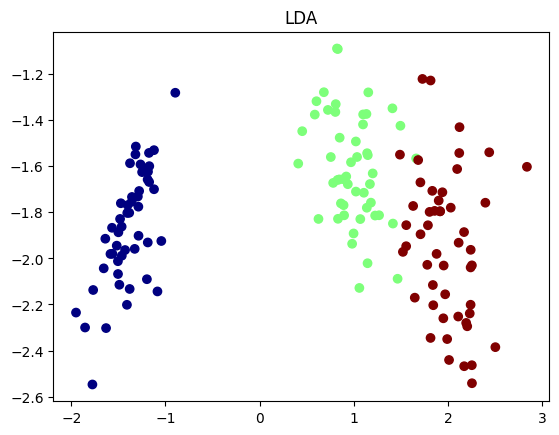

In [4]:
X = load_iris().data
Y = load_iris().target
print("Shape of Data:", X.shape)
x1 = X[:,0]
x2 = X[:,1]
plt.scatter(x1, x2, c=Y, cmap="jet")
plt.show()

pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

pc1 = X_projected[:, 0]
pc2 = X_projected[:, 1]
print("Shape of Data:", X_projected.shape)
plt.scatter(pc1, pc2, c=Y, cmap="jet")
plt.title("PCA")
plt.show()


lda = LDA(2)
lda.fit(X, Y)
X_projected = lda.transform(X)
ld1 = X_projected[:, 0]
ld2 = X_projected[:, 1]
print("Shape of transformed Data:", X_projected.shape)
plt.scatter(ld1, ld2, c=Y, cmap="jet")
plt.title("LDA")
plt.show()